In [1]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import *
import matplotlib.pyplot as plt
import matplotlib.axes as ma
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as sto
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [2]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign2_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

### 1. Tracer la différence relative entre les taux de conversion des groupes A et B en fonction du temps pour la campagne.

#### a. Différence relative des taux de conversion par jour, semaine et mois

In [3]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]


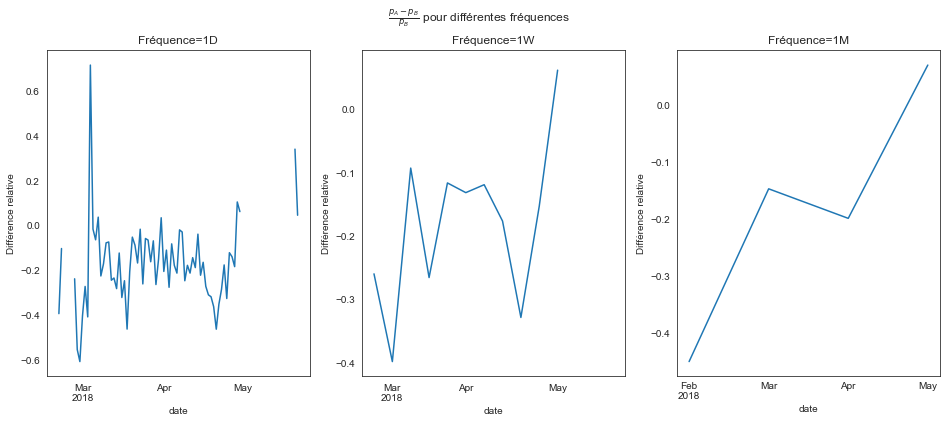

In [4]:
# trace des variations relatives du taux de conversion entre A et B pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

Ci-dessus sont tracés les séries de la différence relative du taux de conversion entre A et B. Les trois graphiques correspondent respectivement à une agrégation du taux de conversion par jour, par semaine et par mois.
Ces tracés permettent d’avoir une première visualisation rapide des données et d’observer les
particularités, les différences facilement notables. Il s’agit en fait d’avoir une première idée de ce que l’on manipule.
L'utilisation de différents niveaux d'agrégation permet de comparer les taux à ces différentes échelles et de déterminer laquelle est la plus intéressante pour notre étude.

Ici, on remarque des grandes différences entre les différents niveaux d'agrégation, liées majoritairement au nombre de points disponibles. Le taux moyen par jour semble présenter une composante périodique alors que les taux par semaine et par mois manquent de points pour l'analyse. Le taux moyen par semaine présente néanmoins un début de composante périodique. 

#### b. Pattern journalier/hebdomadaire/mensuel sur la différence relative des taux journaliers?

In [3]:
dataA, dataB = preparer(data)

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


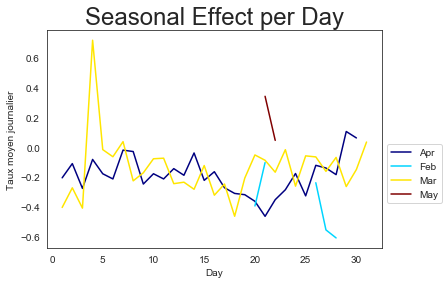

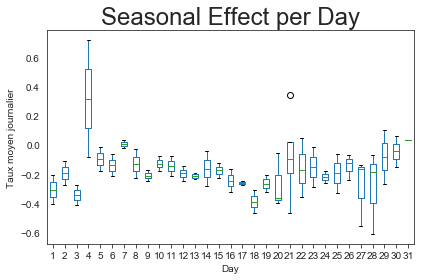

In [4]:
diff = (dataA['is_conv'] - dataB['is_conv']) /dataB['is_conv']
diff.index = pd.to_datetime(diff.index)
diff = pd.Series.to_frame(diff)
effet_journalier(diff)

Le premier graphe correspond au tracé de la série pour les différents mois afin de pouvoir les observer chacun séparément et d'identifier un motif commun s'il en est. Le second graphe présente les boxplots des taux de conversion par jour pour chaque jour du mois (par exemple, le premier boxplot est le boxplot des valeurs du 1er février, 1er mars, 1er avril et 1er mai).

Il est à noter que les mois n'ont pas le même nombre de jours et qu'il y a des données manquantes ce qui perturbe l'analyse.

On peut toutefois deviner un motif de fin et début de mois où le taux semble augmenter légèrement. Cela peut s'expliquer par le fait que les budgets des campagnes se décident en fin/début de mois et donc c'est à ce moment qu'une nouvelle campagne peut se lancer. Il faudrait davantage de données pour confirmer ce pattern.

### 2. Z_test et P_value cumulées

#### a. Pas d'un jour

In [5]:
Z_cum, P_rej, p_cum = testZ_cum(data)

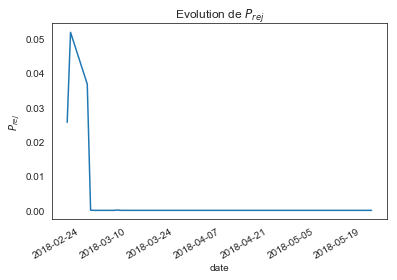

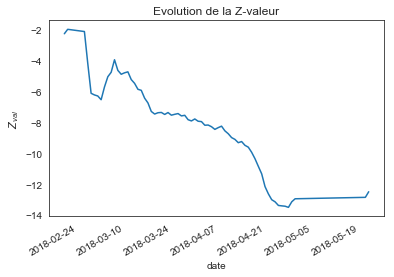

In [6]:
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()


Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')
plt.show()

Nous tracons les graphiques des P-valeur et Z-valeur en fonction du temps, ceci nous permet d'avaluer la significativité du test au cours du temps puisque celle-ci dépend précisément de ces deux valeurs.

Nous observons une stabilité rapide de P (27 fev 2018), beaucoup plus lente pour Z (21 avril 2018). Cette différence est intéressante et est due à l'effet de la gaussienne dans la p-valeur, non présent dans la Z-valeur.

### 3. Évolution de la significativité du test

#### a. Significativité à 90%

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :
100.0


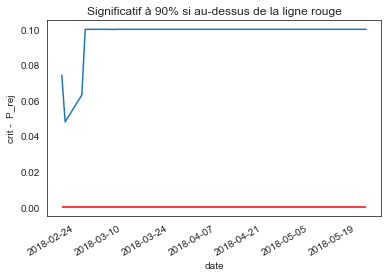

In [7]:
crit = 0.1 #90%

s =  - (P_rej - crit)  # il faut P_rej < crit, soit s > 0
   
s.plot(title="Significatif à 90% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :")
print(round(sum((P_rej - crit < 0))/len(P_rej)*100,1))


Nous ajoutons au graphique précédent la ligne de significativité du test à 90%: le test est significatif si la p-valeur est plus petite qu'une certaine valeur critique, choisie ici à 0.1. Nous tracons donc la différence entre la valeur critique et la p-valeur du test qui doit être positive pour assurer la significativité du test.

Ici, la p-valeur est toujours inférieure à la valeur critique, le test est donc significatif, une version est meilleure que l'autre. Le signe de la Z-stattistique nous indique laquelle: en effet Z étant du signe de pA - pB, Z positif signifie une dominance de la version A, Z négatif une dominance de la version B en termes de conversions. La version B est en l'occurence meilleure que la A ici.


##### Par semaine

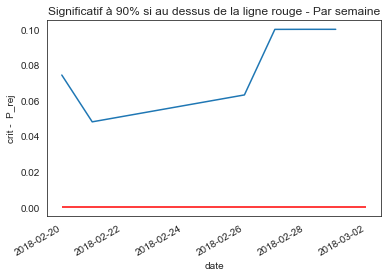

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


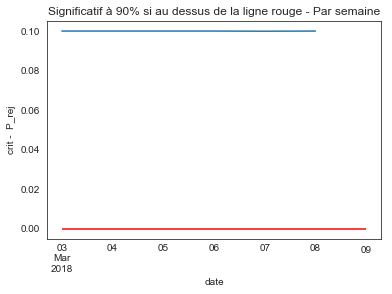

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


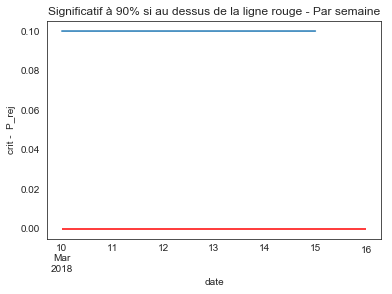

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


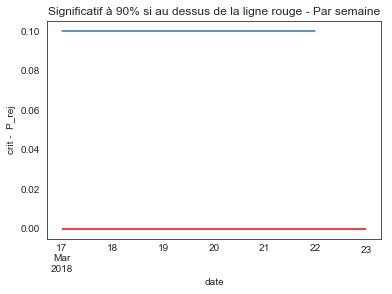

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


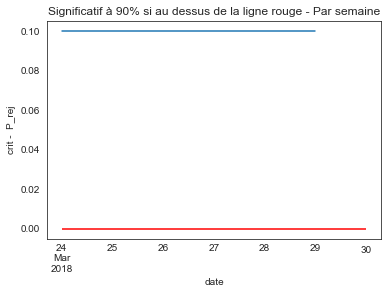

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


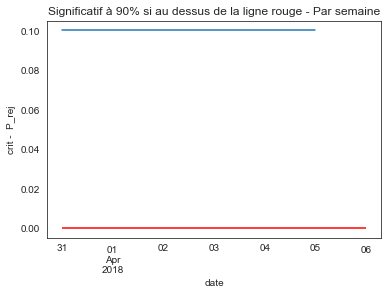

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


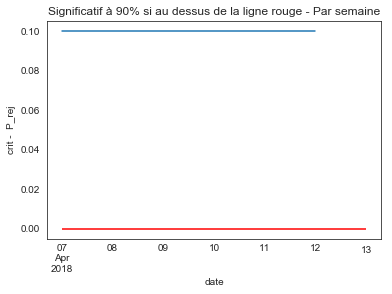

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


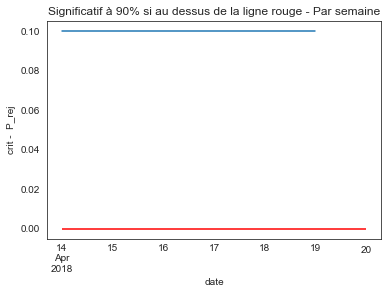

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


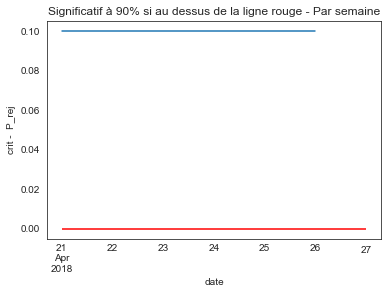

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


In [8]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    # pourcentage de p_val significative ie < crit
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))
    


Nous tracons la significativité par semaine afin d'identifier des variations plus locales, dans notre cas, le test reste toujours significatif.

##### Par mois

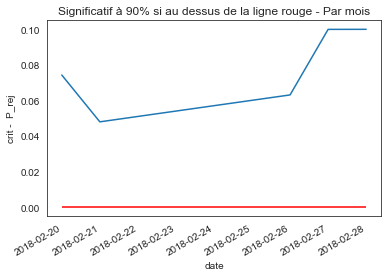

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


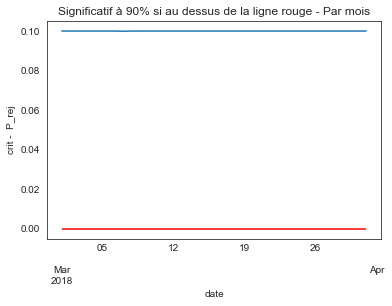

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


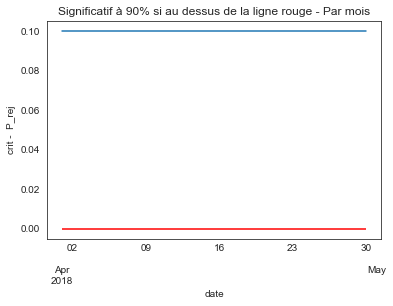

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


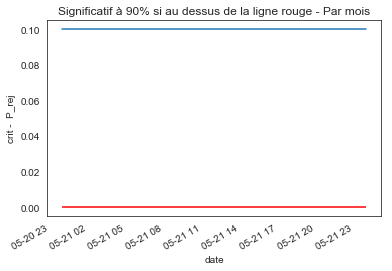

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


In [13]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous tracons de même la significativité par mois. Le test reste significatif bien sûr.

#### b. Significativité à 80%

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :
100.0


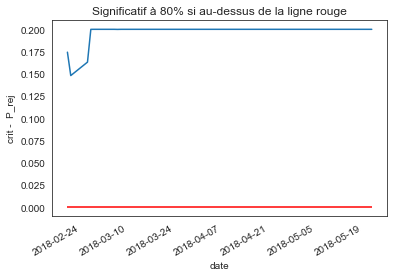

In [14]:
crit = 0.2 #80%

s = - (P_rej - crit)

s.plot(title="Significatif à 80% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :")
print(round(sum((P_rej - crit <= 0))/len(P_rej)*100,1))

Nous recommencons l'analyse avec un seuil de significativité moins élevé : 80%. Le test est bien significatif à 80%, la version B est la meilleure.

##### Par semaine

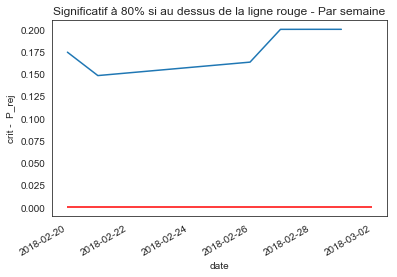

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


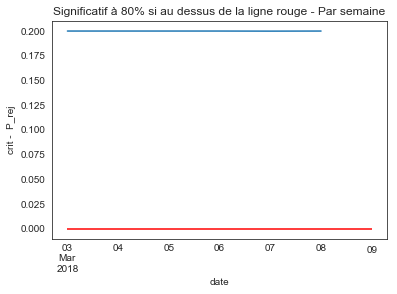

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


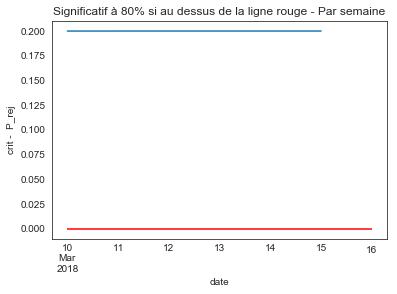

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


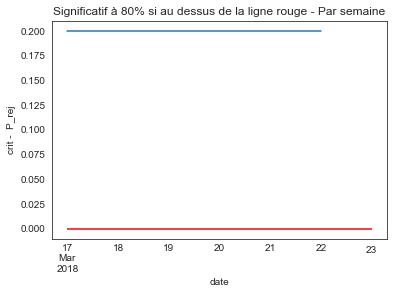

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


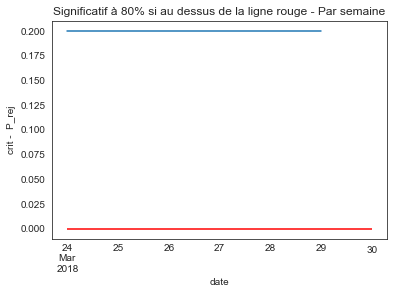

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


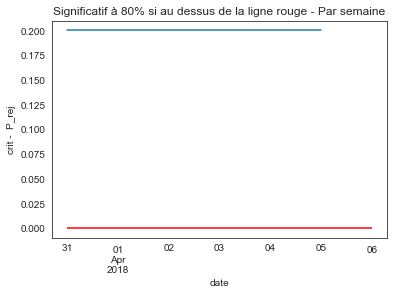

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


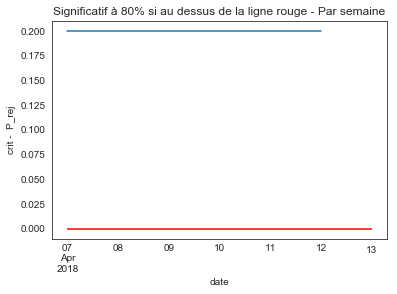

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


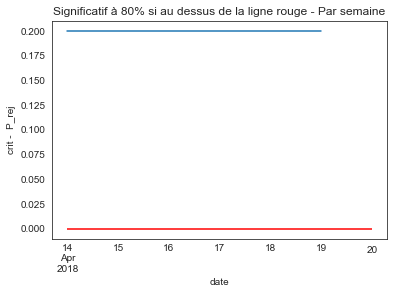

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


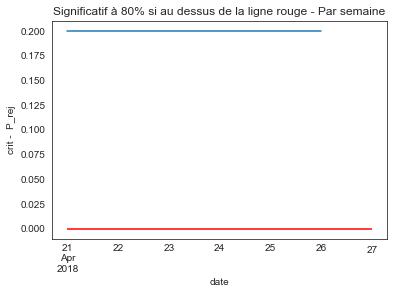

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


In [15]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))

##### Par mois


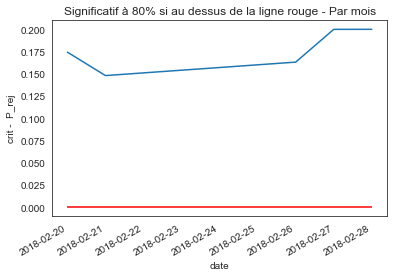

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


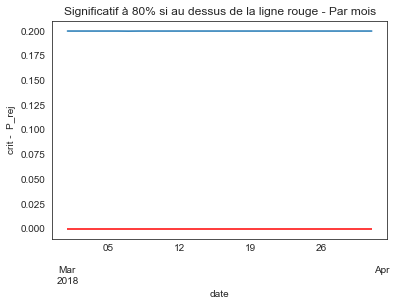

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


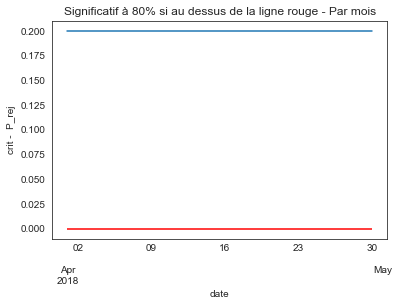

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


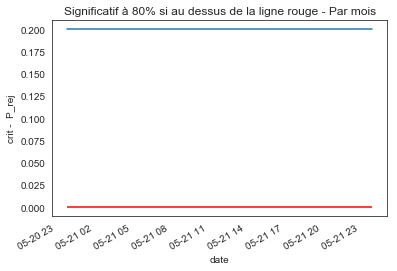

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


In [16]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous n'observons sans surprise aucune variation dans un mois ou une semaine, le test est toujours significatif.

#### c. Tests Z cumulés

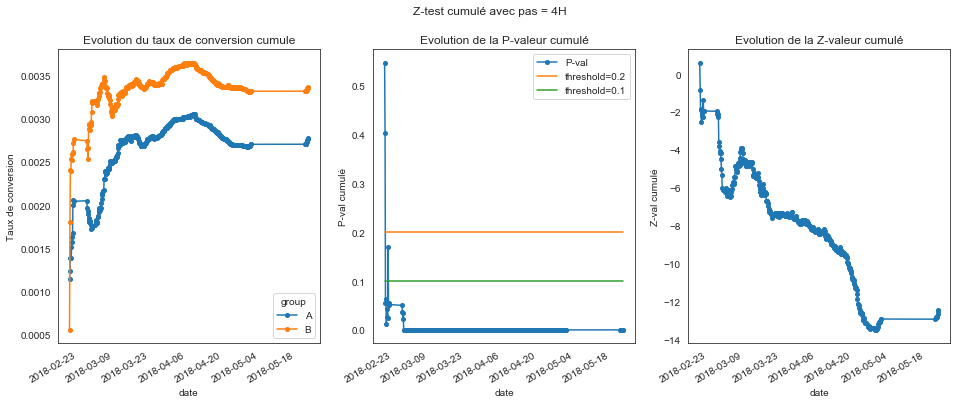

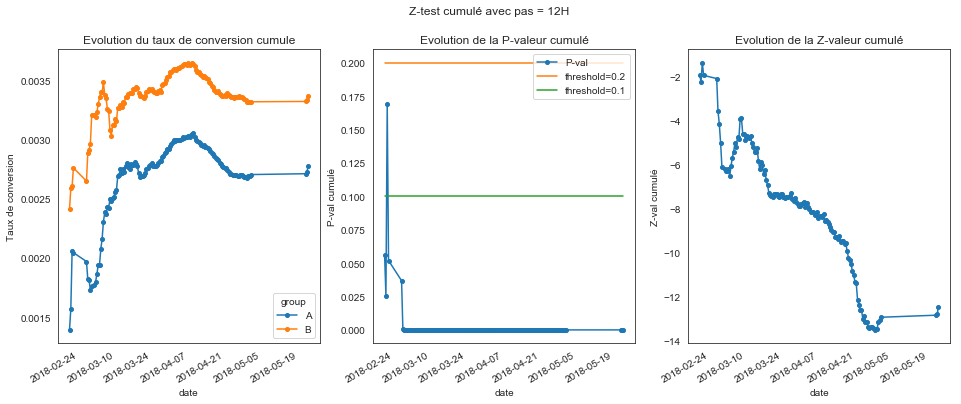

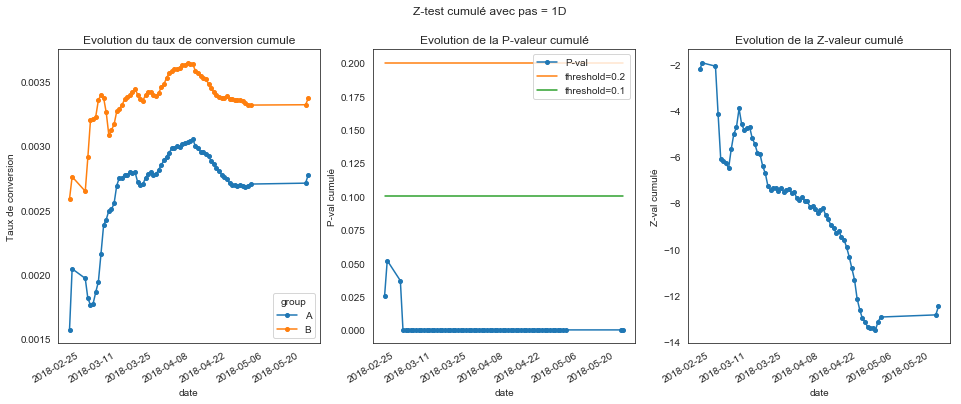

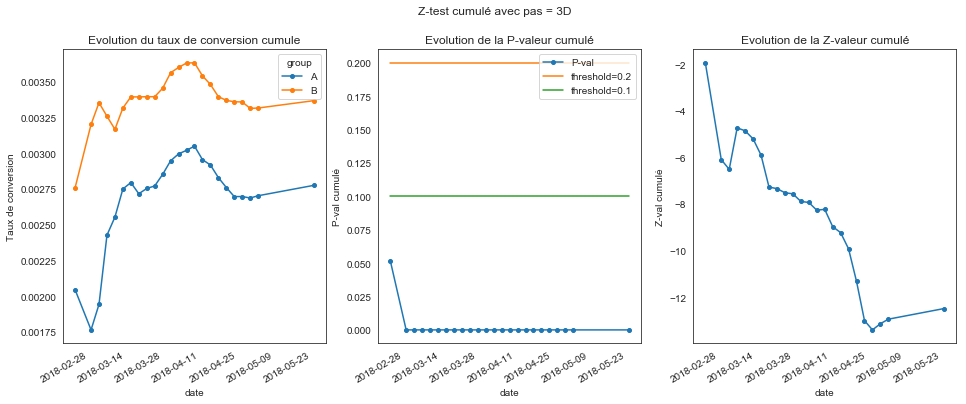

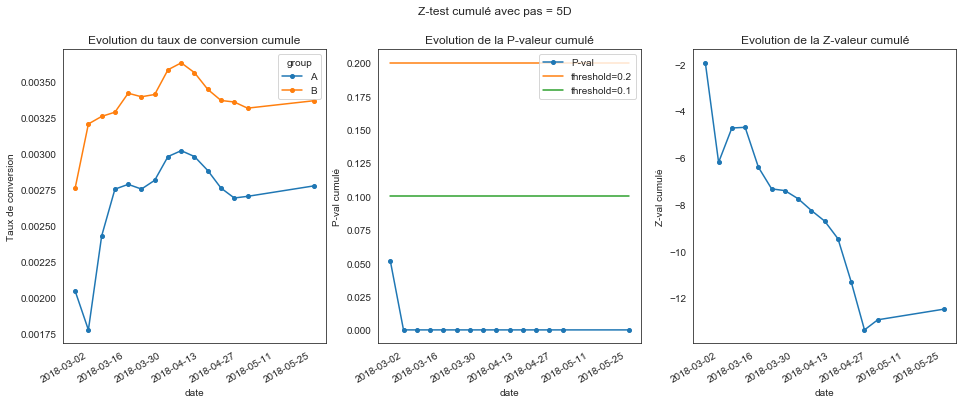

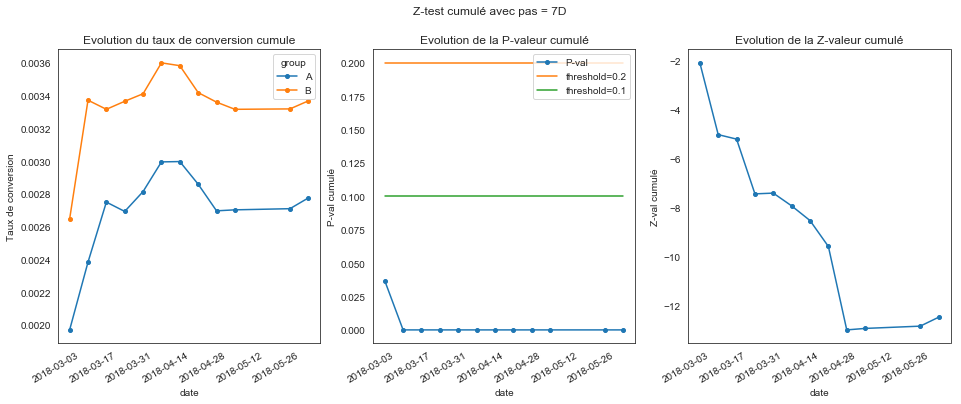

In [3]:
for freq in ["4H", "12H", "1D","3D", "5D", "7D"]:  # 1W does not work but 7D is ok
    Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq=freq)
    plot_testZ_cum_frequency(Z_cum, P_rej, p_cum, freq)

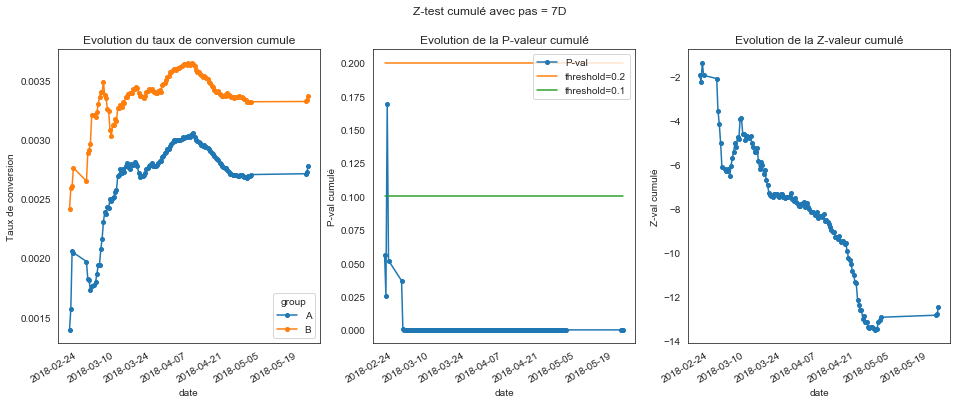

In [4]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq="12H")
plot_testZ_cum_frequency(Z_cum, P_rej, p_cum, freq)

Ici, nous nous intéressons au Z-test du taux de conversion cumulé sur différents pas de temps (de plusieurs heures à plusieurs jours) afin de déceler des éventuelles différences de comportements en fonction du niveau d'agrégation. Le test est signifatif si la courbe de la P-valeur est en dessous des valeurs seuil 0.2 et 0.1. 

Le test est reste évidemment significatif pour les différentes fréquences testées. On remarque peu de différences entre les pas de temps cumulés, la forme des courbes reste la même, seul le nombre de points varie puisqu'il y en a moins lorsque l'on agrège sur un plus grand intervalle de temps.

### 4. Stationnarité de la série de la différence relative des taux de conversion journaliers

In [5]:
adf_test(diff['is_conv'])

,Results of Augmented Dickey-Fuller test:
test statistic,-3.510210
p-value,0.007729
# of lags,1.000000
# of observations,66.000000
Critical Value (1%),-3.533560
Critical Value (5%),-2.906444
Critical Value (10%),-2.590724


La stationnarité de la série est évaluée grâce au test de Dickey-Fuller, ce qui engendrera ou non des transformations diférentielle ou logarithmique sur la série. L’intérêt de cette étude est de déterminer si la série est stationnaire et la tranformer si ce n’est pas le cas. En effet, la moyenne d’une série stationnaire ne dépend pas du temps, ni même sa fonction de convariance, il est donc plus aisé de manipuler des séries stationnaires.

Ici, la statistique de test est très légèrement supérieure à la valeur critique à 1%, la série est presque stationnaire. Elle l'est de manière certaine après différenciation au 1er ordre:

In [6]:
adf_test(np.diff(diff['is_conv']))

,Results of Augmented Dickey-Fuller test:
test statistic,-1.348981e+01
p-value,3.122245e-25
# of lags,0.000000e+00
# of observations,6.600000e+01
Critical Value (1%),-3.533560e+00
Critical Value (5%),-2.906444e+00
Critical Value (10%),-2.590724e+00


La série différenciée une fois est stationnaire et le test donne B comme meilleure version de la bannière.

### 5. Modèles ARMA

Nous tentons ici de trouver un modèle ARMA pour les séries temporelles Z et P avec un pas de 1 jour. Identifier le meilleur modèle correspondant aux données nous permettra d'appliquer certaines propriétés connues dans le but de pouvoir prédire l'instant d'arrêt du test entre les deux versions (i.e. prédire aue l'évolution sera stable à partir de cet instant d'arrêt).

In [3]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq='1D')

#### a. Z statistique

## Analyse classique d'une ST

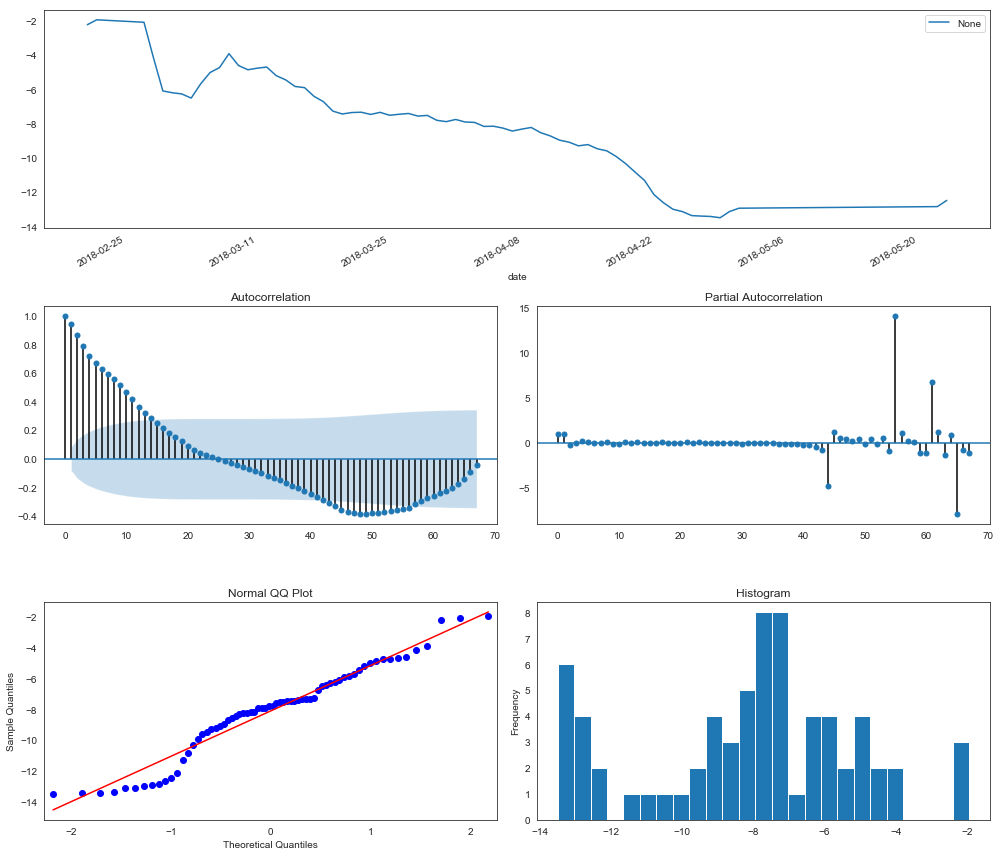

## Décomposition de la série de temps selon modèle multiplicatif



Multiplicative seasonality is not appropriate for zero and negative values


## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-0.453806
p-value,0.900720
# of lags,11.000000
# of observations,56.000000
Critical Value (1%),-3.552928
Critical Value (5%),-2.914731
Critical Value (10%),-2.595137


In [4]:
analyserZP(Z_cum)

In [13]:
sto.arma_order_select_ic(Z_cum,ic = ['aic', 'bic'],max_ar=4, max_ma=4)

{'aic':             0           1           2            3           4
 0  343.648899  264.769806  196.350230   171.620719  126.031980
 1  100.215154   82.427670   83.353541    84.818145   78.378144
 2   81.805370   82.932673   81.277153    86.050630  278.584643
 3   83.363919         NaN   80.881121  7271.549192   79.571367
 4   84.168189   85.702183   79.918624    81.278204   77.825200,
 'bic':             0           1           2            3           4
 0  348.087915  271.428329  205.228261   182.718258  139.349026
 1  106.873678   91.305701   94.451079    98.135191   93.914697
 2   90.683401   94.030212   94.594199   101.587184  296.340704
 3   94.461457         NaN   96.417675  7289.305253   99.546936
 4   97.485235  101.238737   97.674686   101.253773  100.020277,
 'aic_min_order': (4, 4),
 'bic_min_order': (2, 0)}

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   68
Model:                     ARMA(2, 0)   Log Likelihood                 -36.903
Method:                       css-mle   S.D. of innovations              0.402
Date:                Wed, 23 Jan 2019   AIC                             81.805
Time:                        08:59:21   BIC                             90.683
Sample:                             0   HQIC                            85.323
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6886      2.721     -2.825      0.006     -13.022      -2.355
ar.L1.y        1.5094      0.105     14.400      0.000       1.304       1.715
ar.L2.y       -0.5218      0.108     -4.839      0

## Erreurs

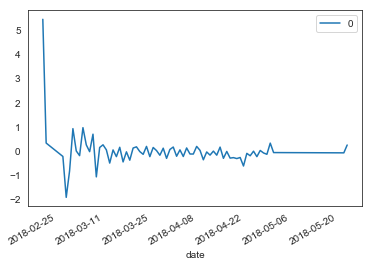

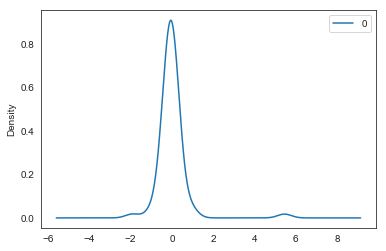

               0
count  68.000000
mean    0.006359
std     0.777026
min    -1.917328
25%    -0.225883
50%    -0.034408
75%     0.133653
max     5.457669


In [5]:
#testARMA(Z_cum,4,0,4)  not stationary
testARMA(Z_cum,2,0,0)

MA(2) retenu. Les p-valeurs des coefficients sont inférieures au seuil 0,2 et quasiment à celui de 0,1. Les erreurs du modèle suivent une gaussienne centrée en 0.

#### b. P valeur

## Analyse classique d'une ST

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


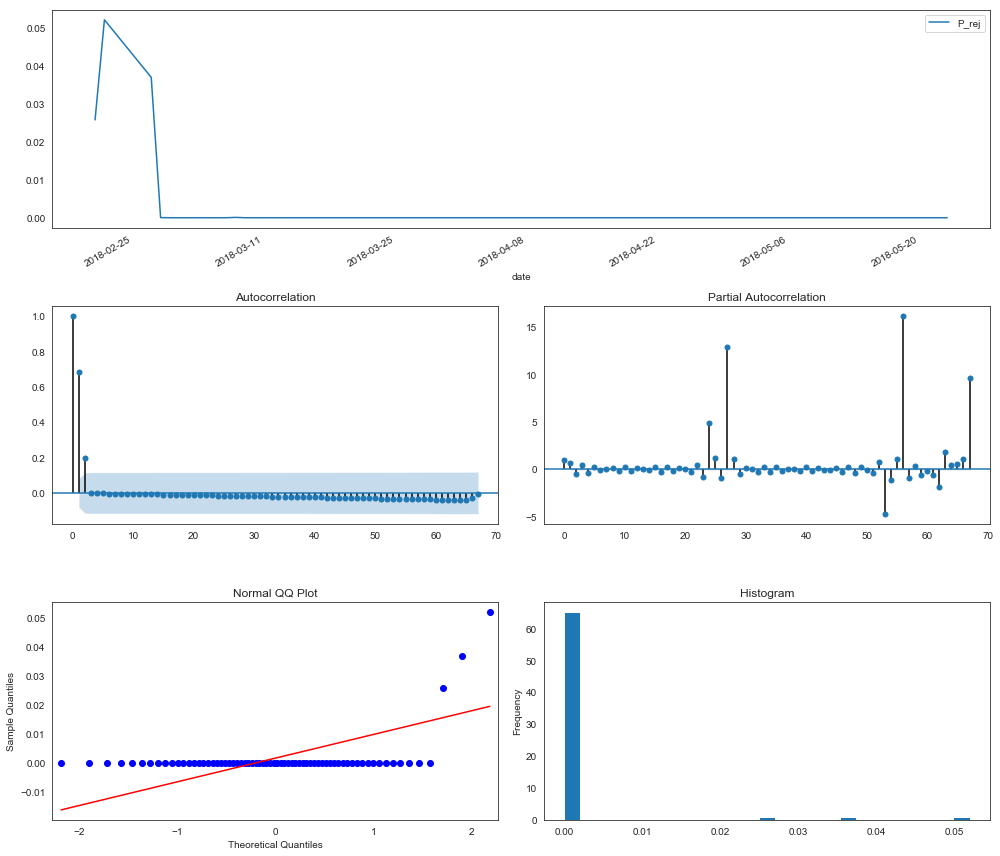

## Décomposition de la série de temps selon modèle multiplicatif



Multiplicative seasonality is not appropriate for zero and negative values


## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-2359.920372
p-value,0.000000
# of lags,11.000000
# of observations,56.000000
Critical Value (1%),-3.552928
Critical Value (5%),-2.914731
Critical Value (10%),-2.595137


In [6]:
analyserZP(P_rej)

Observations: la fonction d'autocorrélation est nulle pour des lags srictement supérieurs à 2, on peut donc approximer la série par un modèle MA(2) qui admet une solution stationnaire. Cela est confirmé par le test de Dickey-Fuller: la série des p-valeur est stationnaire.

In [11]:
sto.arma_order_select_ic(P_rej,ic = ['aic', 'bic'],max_ar = 4,max_ma = 4)

{'aic':             0           1           2           3           4
 0 -457.026259 -520.614474 -533.713566 -531.921366 -529.956294
 1 -506.667385 -533.534976 -531.902307 -529.948277 -528.652124
 2 -528.880195 -531.931321 -529.945005 -527.954015 -526.660717
 3 -531.236055 -529.944280 -527.945644 -525.957233         NaN
 4 -529.861607         NaN         NaN         NaN -521.945946,
 'bic':             0           1           2           3           4
 0 -452.587243 -513.955951 -524.835535 -520.823827 -516.639248
 1 -500.008862 -524.656946 -520.804768 -516.631231 -513.115570
 2 -520.002164 -520.833782 -516.627959 -512.417461 -508.904655
 3 -520.138516 -516.627233 -512.409090 -508.201171         NaN
 4 -516.544560         NaN         NaN         NaN -499.750869,
 'aic_min_order': (0, 2),
 'bic_min_order': (0, 2)}

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                  P_rej   No. Observations:                   68
Model:                     ARMA(0, 1)   Log Likelihood                 263.307
Method:                       css-mle   S.D. of innovations              0.005
Date:                Wed, 23 Jan 2019   AIC                           -520.614
Time:                        08:34:34   BIC                           -513.956
Sample:                             0   HQIC                          -517.976
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0018      0.001      1.532      0.130      -0.001       0.004
ma.L1.P_rej     0.9870      0.108      9.128      0.000       0.775       1.199
                                    Roots     

## Erreurs

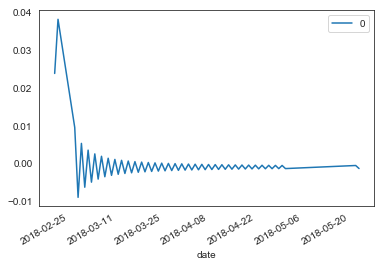

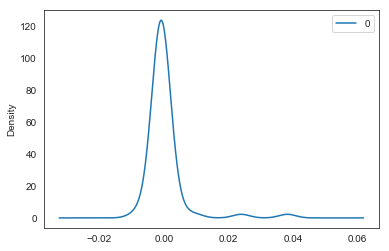

               0
count  68.000000
mean    0.000106
std     0.006047
min    -0.008944
25%    -0.001700
50%    -0.000496
75%     0.000003
max     0.038226


In [19]:
#testARMA(P_rej,0,0,2) not invertible
testARMA(P_rej,0,0,1)

Le test ARMA nous indique qu'un modèle MA(1) serait plus adapté aux données car le MA(2) calculé n'est pas inversible. Les p-valeurs des coefficients sont inférieures au seuil 0,2 et quasiment à celui de 0,1. Les erreurs du modèle suivent une gaussienne centrée en 0.

#### c. Regarder à un temps t < tmax

L'idée est ici de tronquer la série chronologique de Z ou P à un instant t avant la fin de la campagne et de lui faire correspondre un modèle dans le but de savoir s'il est possible d'arrêter le test avant. (question budgétaire)

In [23]:
t = round(0.75*len(Z_cum))
Z_tronq = Z_cum[0:t]
P_tronq = P_rej[0:t]

In [26]:
#analyserZP(Z_tronq)
print("Z_tronq")
sto.arma_order_select_ic(Z_tronq,ic = ['aic', 'bic'],max_ar = 4,max_ma = 4)

Z_tronq


{'aic':             0           1           2           3          4
 0  211.235606  158.722151  117.831655  110.756618  83.605920
 1   83.304092   72.174805   73.845497   75.727760  71.318021
 2   73.036677   73.780647   75.658466   77.470458  73.455561
 3   74.362413   75.677757   80.270252   76.573485  73.720963
 4   75.766658   77.266387   87.337294  138.189428        NaN,
 'bic':             0           1           2           3          4
 0  215.099258  164.517628  125.558958  120.415746  95.196874
 1   89.099569   79.902108   83.504625   87.318714  84.840801
 2   80.763980   83.439775   87.249419   90.993238  88.910166
 3   84.021541   87.268711   93.793032   92.028090  91.107394
 4   87.357612   90.789167  102.791899  155.575859        NaN,
 'aic_min_order': (1, 4),
 'bic_min_order': (1, 1)}

In [25]:
print("P_tronq")
sto.arma_order_select_ic(P_tronq,ic = ['aic', 'bic'],max_ar = 4,max_ma = 4)

P_tronq


{'aic':             0           1           2           3           4
 0 -327.829192 -374.269162 -383.356594 -381.507387 -379.540756
 1 -363.816122 -383.107272 -381.493118 -379.530492 -378.261767
 2 -379.425470 -381.521171 -379.536991 -377.538929 -376.264392
 3 -380.874205 -379.534182 -377.537100 -375.536997         NaN
 4 -379.466500 -377.542685         NaN         NaN         NaN,
 'bic':             0           1           2           3           4
 0 -323.965541 -368.473685 -375.629292 -371.848259 -367.949802
 1 -358.020645 -375.379969 -371.833990 -367.939538 -364.738988
 2 -371.698168 -371.862043 -367.946038 -364.016150 -360.809787
 3 -371.215077 -367.943228 -364.014321 -360.082392         NaN
 4 -367.875546 -364.019905         NaN         NaN         NaN,
 'aic_min_order': (0, 2),
 'bic_min_order': (0, 2)}

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                  P_rej   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                 190.135
Method:                       css-mle   S.D. of innovations              0.006
Date:                Wed, 23 Jan 2019   AIC                           -374.269
Time:                        09:12:04   BIC                           -368.474
Sample:                             0   HQIC                          -372.055
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0024      0.002      1.550      0.128      -0.001       0.005
ma.L1.P_rej     0.9993      0.460      2.172      0.035       0.097       1.901
                                    Roots     

## Erreurs

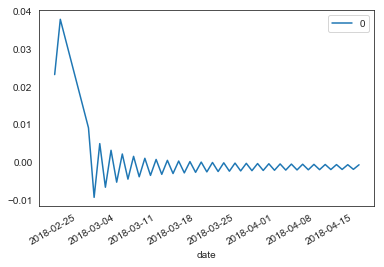

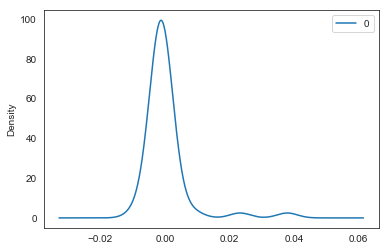

               0
count  51.000000
mean    0.000136
std     0.006938
min    -0.009246
25%    -0.002278
50%    -0.000592
75%     0.000047
max     0.037922


In [28]:
testARMA(P_tronq,0,0,1)

La série tronquée des p-valeurs suit le même modèle que la série complète => arrêter test plus tôt?